In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
all_data = pd.read_csv("all_data.csv")
#print(all_data.head())

#Rename Life expectancy column to a shorter name.
all_data = all_data.rename(columns={'Life expectancy at birth (years)': 'Lexp'})

#Id like to format the GPD column to something more readable, maybe the number in billion.

all_data['GDP'] = [ x / 1e12 for x in all_data['GDP'] ]
#print(all_data['GDP'][all_data['Country'] == 'Germany'])

32    1.94995
33    1.95065
34    2.07914
35    2.50573
36    2.81925
37    2.86141
38    3.00245
39    3.43995
40    3.75237
41    3.41801
42    3.41709
43    3.75770
44    3.54398
45    3.75251
46    3.89061
47    3.37561
Name: GDP, dtype: float64


In [4]:
#Checking if there is any missing values and checking the Dtypes. Everything looking good for now. 

all_data['Country'] = all_data['Country'].astype('string')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     string 
 1   Year     96 non-null     int64  
 2   Lexp     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), string(1)
memory usage: 3.1 KB


In [11]:
#The countries and years we get
print(all_data.Country.unique())
print(all_data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [70]:
#Summary statics
mean_lexp = all_data[['Country', 'Lexp']].groupby('Country').mean().sort_values(by='Lexp')
mean_gdp = all_data[['Country', 'GDP']].groupby('Country').mean().sort_values(by='GDP')

std_lexp = all_data[['Country', 'Lexp']].groupby('Country').std().sort_values(by='Lexp')
print(mean_lexp)
print(mean_gdp)

all_data[['Country', 'Lexp']].groupby('Country').describe()

#I think there is some interesting findings, for example china mean lexp is the secong lowest, but the china has the second largest mean GDP. 

                              Lexp
Country                           
Zimbabwe                  50.09375
China                     74.26250
Mexico                    75.71875
United States of America  78.06250
Chile                     78.94375
Germany                   79.65625
                                GDP
Country                            
Zimbabwe                   0.009063
Chile                      0.169789
Mexico                     0.976651
Germany                    3.094776
China                      4.957714
United States of America  14.075000


Lexp                                           \
                         count      mean       std   min     25%    50%   
Country                                                                   
Chile                     16.0  78.94375  1.058911  77.3  77.975  79.00   
China                     16.0  74.26250  1.318016  71.7  73.400  74.45   
Germany                   16.0  79.65625  0.975000  78.0  78.950  79.85   
Mexico                    16.0  75.71875  0.620987  74.8  75.225  75.65   
United States of America  16.0  78.06250  0.832566  76.8  77.425  78.15   
Zimbabwe                  16.0  50.09375  5.940311  44.3  45.175  47.40   

                                        
                             75%   max  
Country                                 
Chile                     79.825  80.5  
China                     75.250  76.1  
Germany                   80.525  81.0  
Mexico                    76.150  76.7  
United States of America  78.725  79.3  
Zimbabwe                  55.325  60.7

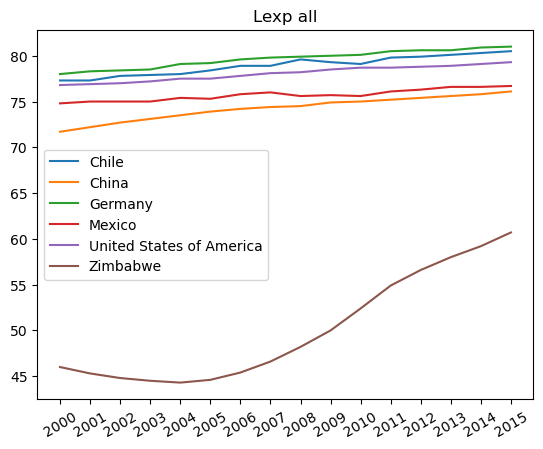

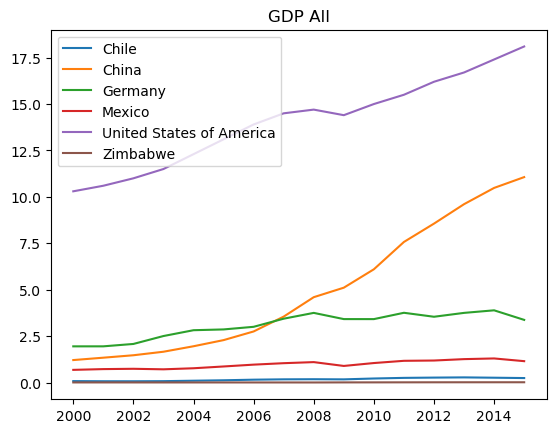

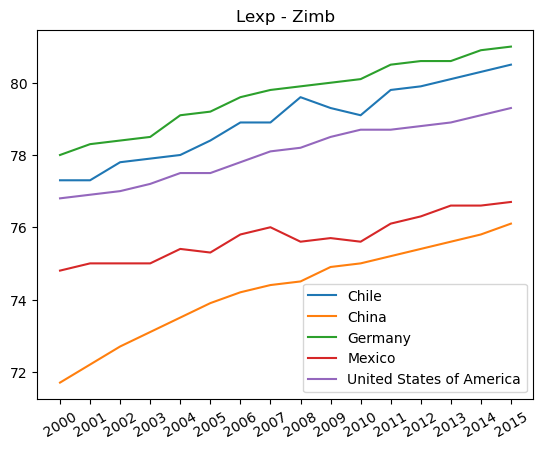

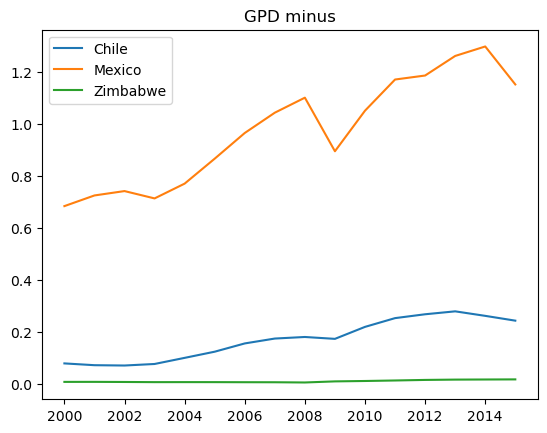

<Figure size 640x480 with 0 Axes>

In [195]:
#start to build graphs from the data
countries = []
years = []



for country in all_data['Country']:
    if country not in countries:
        countries.append(country)
    
for x in all_data['Year']:
    if x not in years:
        years.append(x)
    


#new_mexico = all_data['Lexp'][all_data['Country'] == 'Mexico']

for x in countries:
    plt.plot(years, all_data['Lexp'][all_data['Country'] == x])

ax = plt.subplot()
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=30)
plt.legend(countries)
plt.title('Lexp all')
plt.show()
plt.clf()

for x in countries:
    plt.plot(years, all_data['GDP'][all_data['Country'] == x])
plt.legend(countries)
plt.title('GDP All')
plt.show()
plt.clf()

#cut out outliners to get a better picture of the datas. Zimbabwe on the Lexp chart and USA on the GDP chart.

countries.remove('Zimbabwe')
for x in countries:
    plt.plot(years, all_data['Lexp'][all_data['Country'] == x])

ax = plt.subplot()
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=30)
plt.legend(countries)
plt.title('Lexp - Zimb')
plt.show()
plt.clf()

countries.append('Zimbabwe')
countries.remove('United States of America')
countries.remove('China')
countries.remove('Germany')

for x in countries:
    plt.plot(years, all_data['GDP'][all_data['Country'] == x])
plt.legend(countries)
plt.title('GPD minus')
plt.show()
plt.clf()

for country in all_data['Country']:
    if country not in countries:
        countries.append(country)


In [73]:
#function to get GPD of a given country
def get_data(dataframe, country, data):
    new_data = dataframe[data][dataframe['Country']== country]
    return list(new_data)
print(get_data(all_data, 'Mexico', 'GDP'))

[0.683648, 0.724704, 0.74156, 0.713284, 0.770268, 0.866346, 0.965281, 1.04347, 1.10128, 0.894949, 1.05113, 1.17119, 1.1866, 1.26198, 1.29846, 1.15226]


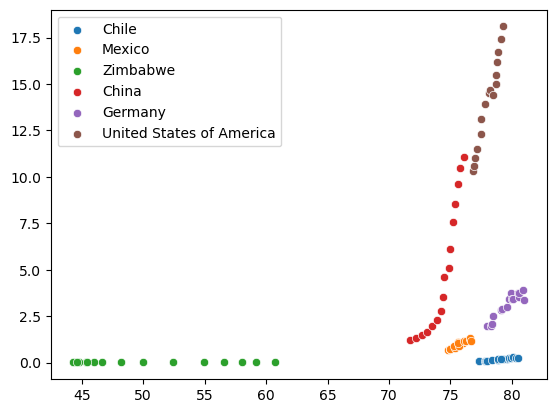

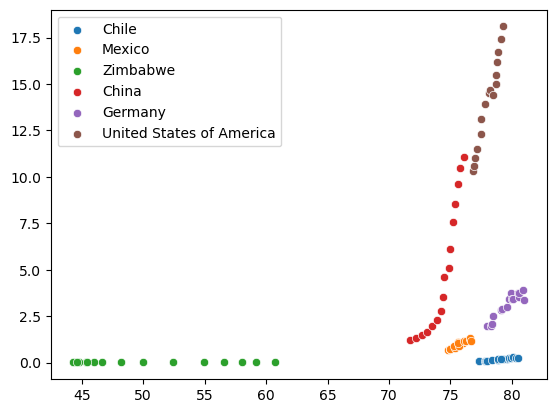

['Chile', 'Mexico', 'Zimbabwe', 'China', 'Germany', 'United States of America']


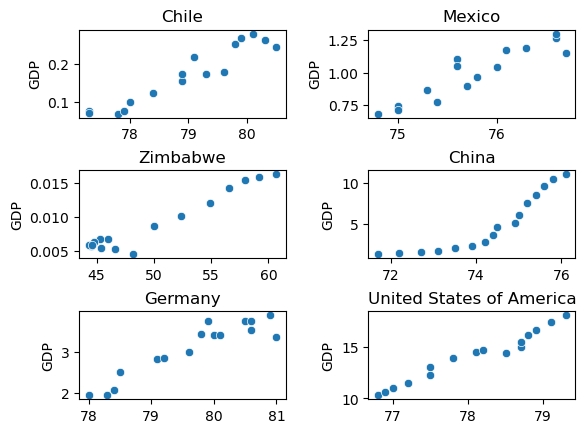

<Figure size 640x480 with 0 Axes>

In [197]:
for x in countries:
    sns.scatterplot(x=get_data(all_data, x, 'Lexp'), y=get_data(all_data, x, 'GDP'))
plt.legend(countries)
plt.show()
plt.clf()

new_countries = countries


for x in new_countries:
    sns.scatterplot(x=get_data(all_data, x, 'Lexp'), y=get_data(all_data, x, 'GDP'))
    
plt.legend(new_countries)
plt.show()
plt.clf()

print(countries)
count = 1
for x in countries:
    plt.subplot(3,2,count)
    sns.scatterplot(x=get_data(all_data, x, 'Lexp'), y=get_data(all_data, x, 'GDP'))
    plt.ylabel('GDP')
    ax = plt.subplot()
    
    plt.title(x)
    count += 1
plt.subplots_adjust(wspace=0.4,hspace=0.6)
plt.show()
plt.clf()

#visualize GPD / countries

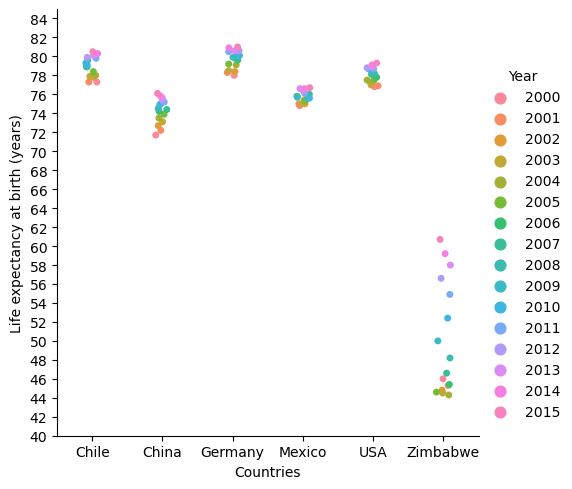

<Figure size 640x480 with 0 Axes>

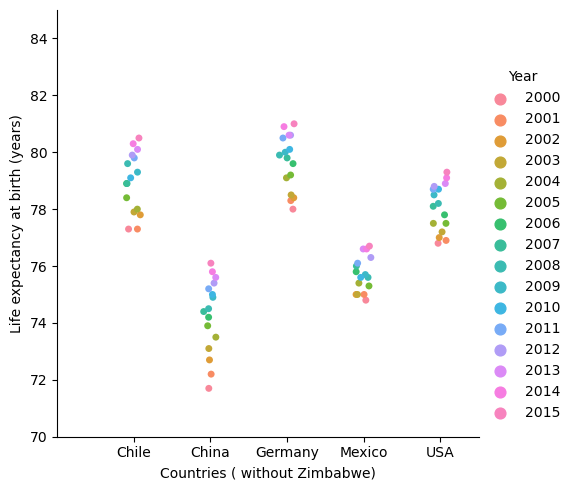

<Figure size 640x480 with 0 Axes>

In [157]:
new_data = all_data[all_data['Country'] != 'Zimbabwe']


sns.catplot(data=all_data, x='Country', y="Lexp", hue = 'Year', hue_order = reversed(years))
plt.axis([-0.5,5.5,40,85])
ax = plt.subplot()
ax.set_yticks(range(40,85,2))
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.xlabel('Countries')
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()


sns.catplot(data=new_data, x='Country', y="Lexp", hue = 'Year', hue_order = reversed(years))
plt.axis([-1,4.5,70,85])
ax = plt.subplot()
ax.set_yticks(range(70,85,2))
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA'])
plt.xlabel('Countries ( without Zimbabwe)')
plt.ylabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

#visualize life expectanice / countires


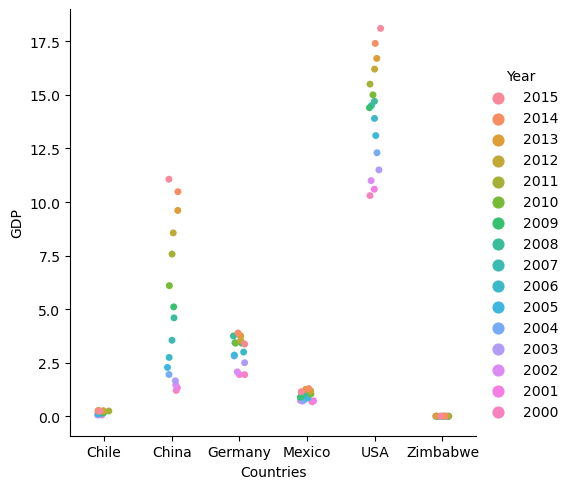

<Figure size 640x480 with 0 Axes>

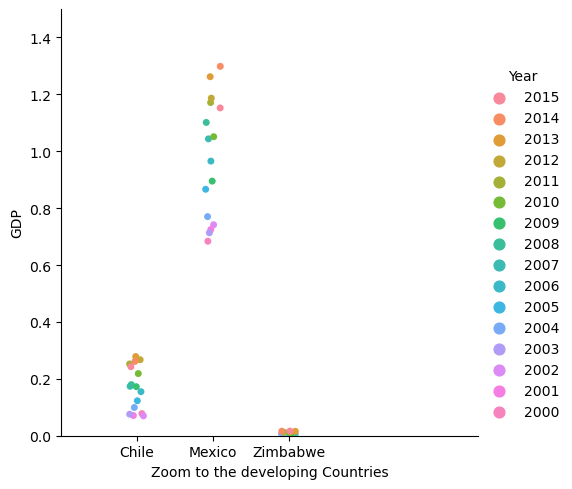

<Figure size 640x480 with 0 Axes>

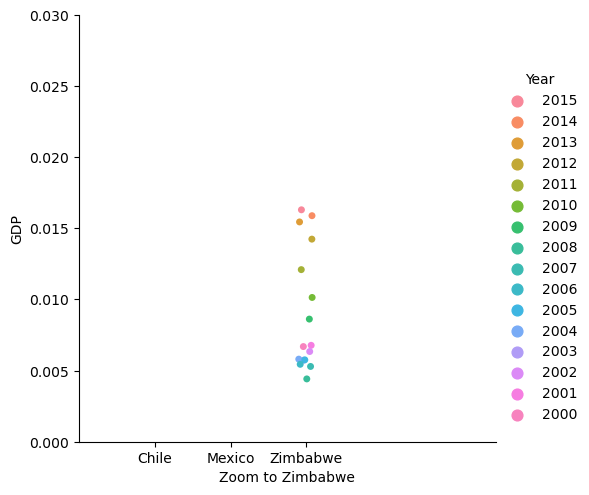

<Figure size 640x480 with 0 Axes>

In [175]:
sns.catplot(data=all_data, x='Country', y="GDP", hue = 'Year', hue_order = reversed(years))
ax = plt.subplot()
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.xlabel('Countries')
plt.ylabel('GDP(billion$)')
plt.show()
plt.clf()

new_gdp_data = all_data[(all_data['Country'] != 'United States of America') & (all_data['Country'] != 'Germany') & (all_data['Country'] != 'China')]



sns.catplot(data=new_gdp_data, x='Country', y="GDP", hue = 'Year', hue_order = reversed(years))
ax = plt.subplot()
plt.axis([-1,4.5,0,1.5])
ax.set_xticklabels(['Chile', 'Mexico', 'Zimbabwe'])
plt.xlabel('Zoom to the developing Countries')
plt.ylabel('GDP(billion$)')
plt.show()
plt.clf()


sns.catplot(data=new_gdp_data, x='Country', y="GDP", hue = 'Year', hue_order = reversed(years))
ax = plt.subplot()
plt.axis([-1,4.5,0,0.03])
ax.set_xticklabels(['Chile', 'Mexico', 'Zimbabwe'])
plt.xlabel('Zoom to Zimbabwe')
plt.ylabel('GDP(billion$)')
plt.show()
plt.clf()